<a href="https://colab.research.google.com/github/whyjayjay/test-1/blob/master/NumericalPython_Chapter5_EquationSolving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# The topic of this chapter is algebraic equation solving.
# Importing Modules
from scipy import linalg as la
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import sympy
sympy.init_printing() 

2


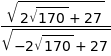

In [ ]:
# Linear Equation Systems 
# Square Systems
# 2x1 + 3x2 = 4
# 5x1 + 4x2 = 23

A = sympy.Matrix([[2,3],[5,4]])
b = sympy.Matrix([4,3])

print(A.rank())
A.condition_number()

In [ ]:
sympy.N(_)

In [ ]:
A.norm()

In [ ]:
A = np.array([[2,3],[5,4]])
b = np.array([4,3])

np.linalg.matrix_rank(A)

2

In [ ]:
np.linalg.cond(A)

In [ ]:
np.linalg.norm(A)

In [ ]:
# LU Decomposition
A = sympy.Matrix([[2,3],[5,4]])
b = sympy.Matrix([4,3])

L, U, _ = A.LUdecomposition()
L

⎡ 1   0⎤
⎢      ⎥
⎣5/2  1⎦

In [ ]:
U

⎡2   3  ⎤
⎢       ⎥
⎣0  -7/2⎦

In [ ]:
L * U

⎡2  3⎤
⎢    ⎥
⎣5  4⎦

In [ ]:
x = A.solve(b); x   # equivalent to A.LUsolve(b)

⎡-1⎤
⎢  ⎥
⎣2 ⎦

In [ ]:
P, L, U = la.lu(A)
L

array([[1. , 0. ],
       [0.4, 1. ]])

In [ ]:
U

array([[5. , 4. ],
       [0. , 1.4]])

In [ ]:
L * U

array([[5. , 0. ],
       [0. , 1.4]])

In [ ]:
A = np.array([[2,3],[5,4]])
b = np.array([4,3])
la.solve(A,b)

array([-1.,  2.])

In [ ]:
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1,sympy.sqrt(p)],[1,1/sympy.sqrt(p)]])
b = sympy.Matrix([1,2])

x = A.solve(b)
x

⎡    2⋅√p           1      ⎤
⎢- ──────── + ─────────────⎥
⎢        1       ⎛      1 ⎞⎥
⎢  -√p + ──   √p⋅⎜-√p + ──⎟⎥
⎢        √p      ⎝      √p⎠⎥
⎢                          ⎥
⎢            1             ⎥
⎢         ────────         ⎥
⎢               1          ⎥
⎢         -√p + ──         ⎥
⎣               √p         ⎦

Text(0.5, 0, '$x$')

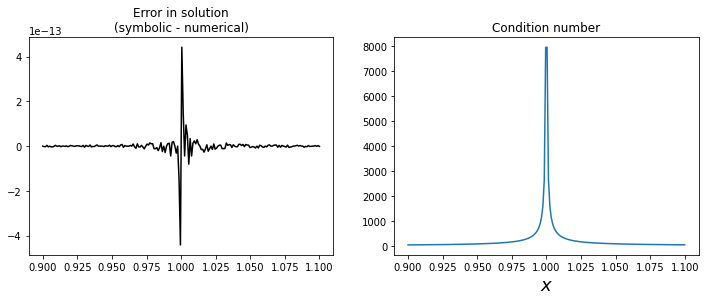

In [ ]:
# Symbolic problem specification
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1,sympy.sqrt(p)],[1,1/sympy.sqrt(p)]])
b = sympy.Matrix([1,2])

# Solve symbolically
x_sym_sol = A.solve(b)
Acond     = A.condition_number().simplify()

# Numerical problem specification
AA = lambda p: np.array([[1,np.sqrt(p)],[1,1/np.sqrt(p)]])
bb = np.array(([1,2]))
x_num_sol = lambda p: np.linalg.solve(AA(p), bb)

# Graph th edifference between the symbolic (exact) and numerical results.
fig, axes = plt.subplots(1,2,figsize=(12,4))
p_vec = np.linspace(0.9, 1.1, 200)
for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p,pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])

axes[0].plot(p_vec, (x_num - x_sym)/x_sym, 'k')
axes[0].set_title("Error in solution\n(symbolic - numerical)")

axes[1].plot(p_vec, [Acond.subs(p, pp).evalf() for pp in p_vec]) 
axes[1].set_title("Condition number")
axes[1].set_xlabel(r'$x$', fontsize=18)


In [ ]:
# Rectangular Systems
x_vars = sympy.symbols("x_1, x_2, x_3")
A      = sympy.Matrix([[1,2,3],[4,5,6]])
x      = sympy.Matrix(x_vars)
b      = sympy.Matrix([7,8])

sympy.solve(A*x - b, x_vars)

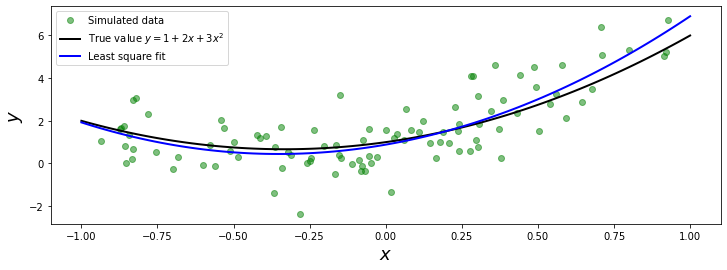

In [ ]:
# Linear least square fit example
# define true model parameters
x = np.linspace(-1,1,100) 
a,b,c = 1,2,3

y_exact = a + b*x + c*x**2

# simulate noisy data
m = 100
X = 1 - 2*np.random.rand(m) 
Y = a + b*X + c*X**2 + np.random.randn(m) 

# fit the data to the model using linear least square
A   = np.vstack([X**0, X**1, X**2])   # see np.vander for alternative
sol,r,rank,s = la.lstsq(A.T, Y)

y_fit = sol[0] + sol[1]*x + sol[2]*x**2

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(X, Y,'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit  , 'b', lw=2, label='Least square fit')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2)

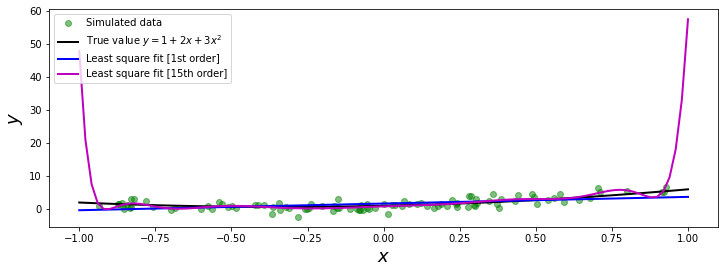

In [ ]:
# Graph demonstrating underfitting and overfitting of data using the linear
# least square method

# fit the data to the model using linear least square:
# 1st order polynomial
A = np.vstack([X**n for n in range(2)])
sol,r,rank,sv = la.lstsq(A.T,Y)
y_fit1 = sum([s*x**n for n, s in enumerate(sol)])

# 15th order polynomial
A = np.vstack([X**n for n in range(16)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit15 = sum([s*x**n for n, s in enumerate(sol)])

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit1, 'b', lw=2, label='Least square fit [1st order]')
ax.plot(x, y_fit15, 'm', lw=2, label='Least square fit [15th order]') 
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2)

In [ ]:
# Eigenvalue Problems
eps, delta = sympy.symbols("epsilon, Delta") 
H = sympy.Matrix([[eps, delta],[delta,-eps]])
H

⎡ε  Δ ⎤
⎢     ⎥
⎣Δ  -ε⎦

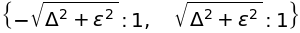

In [ ]:
H.eigenvals()

In [ ]:
H.eigenvects()

⎡⎛                  ⎡⎡      -Δ        ⎤⎤⎞  ⎛                 ⎡⎡      -Δ       
⎢⎜    _________     ⎢⎢────────────────⎥⎥⎟  ⎜   _________     ⎢⎢───────────────
⎢⎜   ╱  2    2      ⎢⎢       _________⎥⎥⎟  ⎜  ╱  2    2      ⎢⎢       ________
⎢⎜-╲╱  Δ  + ε  , 1, ⎢⎢      ╱  2    2 ⎥⎥⎟, ⎜╲╱  Δ  + ε  , 1, ⎢⎢      ╱  2    2
⎢⎜                  ⎢⎢ε + ╲╱  Δ  + ε  ⎥⎥⎟  ⎜                 ⎢⎢ε - ╲╱  Δ  + ε 
⎢⎜                  ⎢⎢                ⎥⎥⎟  ⎜                 ⎢⎢               
⎣⎝                  ⎣⎣       1        ⎦⎦⎠  ⎝                 ⎣⎣       1       

 ⎤⎤⎞⎤
─⎥⎥⎟⎥
_⎥⎥⎟⎥
 ⎥⎥⎟⎥
 ⎥⎥⎟⎥
 ⎥⎥⎟⎥
 ⎦⎦⎠⎦

In [ ]:
(eval1, _, evec1), (eval2, _, evec2) = H.eigenvects()
sympy.simplify(evec1[0].T * evec2[0])

[0]

In [ ]:
A = np.array([[1,3,5],[3,5,3],[5,3,9]])
evals, evecs = la.eig(A) 
evecs

array([[ 0.42663918,  0.90353276, -0.04009445],
       [ 0.43751227, -0.24498225, -0.8651975 ],
       [ 0.79155671, -0.35158534,  0.49982569]])

In [ ]:
la.eigvalsh(A)

array([-1.75902942,  3.40592034, 13.35310908])

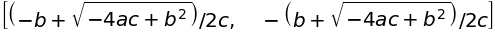

In [ ]:
# Nonlinear Equations
# Univariate Equations
x, a, b, c = sympy.symbols("x,a,b,c")
sympy.solve(a + b*x + c*x**2, x)

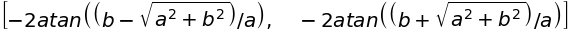

In [ ]:
sympy.solve(a * sympy.cos(x) - b * sympy.sin(x), x)

In [ ]:
sympy.solve(sympy.sin(x) - x, x)

NotImplementedError: ignored

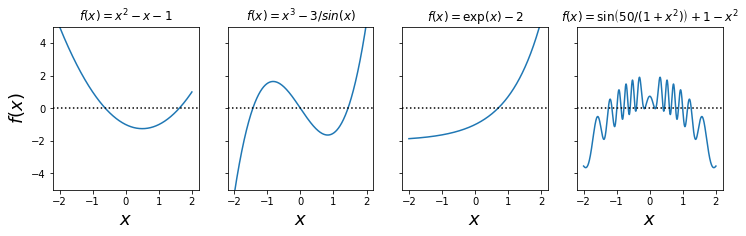

In [ ]:
x = np.linspace(-2,2,1000)

# four examples of nonlinear functions
f1 = x**2 - x - 1
f2 = x**3 - 3 * np.sin(x)
f3 = np.exp(x) - 2
f4 = 1 - x**2 + np.sin(50/(1 + x**2))

# plot each function
fig, axes = plt.subplots(1,4,figsize=(12,3), sharey=True)
for n, f in enumerate([f1,f2,f3,f4]):
    axes[n].plot(x,f,lw=1.5)
    axes[n].axhline(0, ls=':', color='k')
    axes[n].set_ylim(-5,5)
    axes[n].set_xticks([-2,-1,0,1,2])
    axes[n].set_xlabel(r'$x$', fontsize=18)

axes[0].set_ylabel(r'$f(x)$',fontsize=18)
titles = [r'$f(x)=x^2-x-1$'  , r'$f(x)=x^3-3/sin(x)$', 
          r'$f(x)=\exp(x)-2$', r'$f(x)=\sin\left(50/(1+x^2)\right)+1-x^2$']
for n, title in enumerate(titles):
    axes[n].set_title(title)

Text(0.5, 1.0, 'Bisection method')

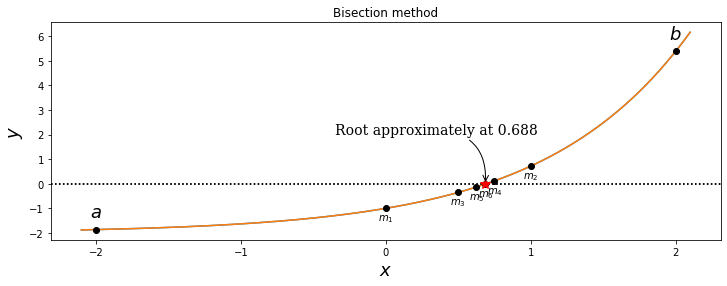

In [ ]:
# bisection method
# define a function, desired tolerance and starting interval [a,b]

f = lambda x: np.exp(x) - 2
tol = 0.1
a, b = -2, 2
x    = np.linspace(-2.1, 2.1, 1000)

# graph the function f
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.plot(x, f(x), lw=1.5)
ax.axhline(0, ls=':', color='k')

ax.plot(x, f(x), lw=1.5)
ax.axhline(0, ls=':', color='k')
ax.set_xticks([-2,-1,0,1,2])
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)

# find the root using the bisection method and visualize
# the steps in the method in the graph
fa, fb = f(a), f(b)

ax.plot(a, fa,'ko')
ax.plot(b, fb,'ko')
ax.text(a, fa + 0.5, r"$a$", ha='center', fontsize=18)
ax.text(b, fb + 0.5, r"$b$", ha='center', fontsize=18)

n = 1
while b - a > tol:
    m = a + (b - a)/2
    fm = f(m)

    ax.plot(m, fm, 'ko')
    ax.text(m, fm - 0.5, r"$m_%d$" % n, ha='center') 
    n += 1

    if np.sign(fa) == np.sign(fm):
        a, fa = m, fm
    else:
        b, fb = m, fm

ax.plot(m, fm, 'r*', markersize=10)
ax.annotate("Root approximately at %.3f" % m,
            fontsize=14, family="serif",
            xy = (a, fm), xycoords='data',
            xytext=(-150, +50), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_title("Bisection method")

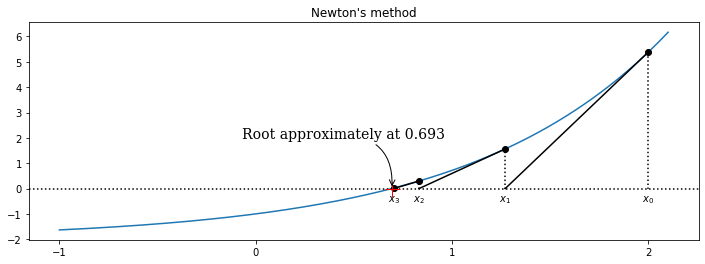

In [ ]:
# Newton's method
# define a function, desired tolerance and starting point xk
tol = 0.01
xk  = 2

s_x = sympy.symbols("x")
s_f = sympy.exp(s_x) - 2

f   = lambda x: sympy.lambdify(s_x, s_f, 'numpy')(x)
fp  = lambda x: sympy.lambdify(s_x, sympy.diff(s_f, s_x), 'numpy')(x)

x   = np.linspace(-1, 2.1, 1000)

# 근 찾기를 시각화해줄 그래프 설정
fig, ax = plt.subplots(1, 1, figsize=(12,4)) 
ax.plot(x, f(x))
ax.axhline(0, ls=':', color='k')

# 원하는 허용 값에 도달할 때까지 뉴턴 기법을 반복
n = 0
while f(xk) > tol:
    xk_new = xk - f(xk) / fp(xk)

    ax.plot([xk, xk], [0, f(xk)], color='k', ls=':')
    ax.plot(xk, f(xk), 'ko')
    ax.text(xk, -.5, r'$x_%d$' % n, ha='center')
    ax.plot([xk, xk_new], [f(xk), 0], 'k-') 

    xk = xk_new
    n += 1

ax.plot(xk, f(xk), 'r+', markersize=15)
ax.annotate("Root approximately at %.3f" % xk,
            fontsize=14, family="serif",
            xy=(xk, f(xk)), xycoords='data',
            xytext=(-150, +50), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
            connectionstyle="arc3, rad=-.5"))

ax.set_title("Newton's method")
ax.set_xticks([-1,0,1,2])

In [ ]:
# bisection method
optimize.bisect(lambda x: np.exp(x) - 2, -2, 2)

In [ ]:
# Newton's method
x_root_guess = 2
f      = lambda x: np.exp(x) - 2
fprime = lambda x: np.exp(x) 

optimize.newton(f, x_root_guess)

In [ ]:
optimize.newton(f, x_root_guess, fprime=fprime)

In [ ]:
# Brent's method
optimize.brentq(lambda x: np.exp(x) - 2, -2, 2)

In [ ]:
optimize.brenth(lambda x: np.exp(x) - 2, -2, 2)

In [ ]:
# Systems of Nonlinear Equations
def f(x):
    return [x[1] - x[0]**3 - 2 * x[0]**2 + 1, x[1] + x[0]**2 - 1]

optimize.fsolve(f, [1,1])

array([0.73205081, 0.46410162])

In [ ]:
x, y  = sympy.symbols("x,y")
f_mat = sympy.Matrix([y - x**3 - 2*x**2 + 1, y + x**2 - 1])
f_mat.jacobian(sympy.Matrix([x,y]))

⎡     2         ⎤
⎢- 3⋅x  - 4⋅x  1⎥
⎢               ⎥
⎣    2⋅x       1⎦

In [ ]:
def f_jacobian(x):
    return [[-3*x[0]**2 - 4*x[0], 1], [2*x[0], 1]]

optimize.fsolve(f, [1,1], fprime=f_jacobian)

array([0.73205081, 0.46410162])

Text(0.5, 0, '$x$')

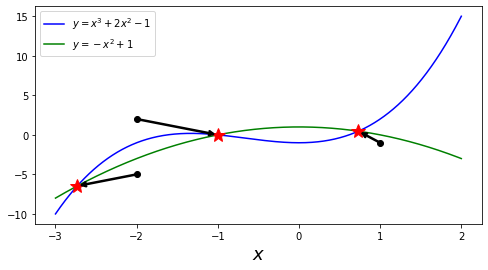

In [ ]:
def f(x):
    return [x[1] - x[0]**3 - 2*x[0]**2 + 1, x[1] + x[0]**2 - 1]

x  = np.linspace(-3, 2, 5000)
y1 = x**3 + 2*x**2 - 1
y2 = -x**2 + 1

fig, ax = plt.subplots(figsize=(8,4)) 
ax.plot(x, y1, 'b', lw=1.5, label=r'$y=x^3 +2x^2 -1$')
ax.plot(x, y2, 'g', lw=1.5, label=r'$y=-x^2 + 1$') 

x_guesses = [[-2,2],[1,-1],[-2,-5]]
for x_guess in x_guesses:
    sol = optimize.fsolve(f, x_guess)
    
    ax.plot(sol[0], sol[1], 'r*', markersize=15)
    ax.plot(x_guess[0], x_guess[1], 'ko')
    ax.annotate("", xy=(sol[0], sol[1]), xytext=(x_guess[0],x_guess[1]),
                arrowprops=dict(arrowstyle="->",linewidth=2.5))
ax.legend(loc=0)
ax.set_xlabel(r'$x$', fontsize=18)